<a href="https://colab.research.google.com/github/ParsaFotowat/ML_Projects/blob/main/Image_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlip

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [89]:
import tensorflow as tf
import os

In [90]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [91]:
# Avoid OOM Errors
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [92]:
import cv2
import imghdr

In [93]:
data_dir='/content/data'

In [94]:
os.listdir(os.path.join(data_dir,'g'))

['1633071496RAP33FR_3.jpg',
 'news_rgd71almsbam.jpg',
 'electric20guitar20header20copy.png',
 'yamaha-electric-guitar-yamaha-pacifica-311h-electric-guitar-red-metallic-13439959269437.jpg',
 'ence375rd_2_.jpg',
 '71udToZJEcL._AC_UF10001000_QL80_.jpg',
 'ClassicWorldWoodenElectricGlowingGuitar1.jpg',
 'sddefault.jpg',
 'LyxPro-Les-Paul-Guitar-Intro-Page-Banner.png',
 'parts_viewer01.jpg',
 'sx-1-2-size-vintage-style-electric-guitar-candy-ap_530x2x.jpg',
 '2802601803.png',
 'Gibson-Les-Paul-Classic-Translucent-Cherry-1.jpg',
 '12841492_800.jpg',
 'CR250DBBmain.png',
 'lespaul01.jpg',
 'electric-guitar-buying-guide-m.jpg',
 'ibanez-grg140-gio-white-electric-guitar-4627-p.jpg',
 '16885427355108007568_evh_ins_frt_1_rr.jpg',
 '1-56.jpg',
 'esp-ltd-alexi-200-electric-guitar-_1_GIT0010399-000.jpg',
 'Antiquity-Gs1-Electric-Guitar-Cherry-Red-1_1.jpg',
 'V7kGiyjB86zQWmqjm9SHV-1200-80.jpg',
 'p_region_q54_bkf_1p_01_sub_1.jpg',
 '91VaRb7u6L.jpg',
 'clanek_nahledovka-scaled.jpg',
 'Verso-Cosmo-Guita

In [95]:
image_ex=['jpeg','jpg','bmp','png']

In [96]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

GMS-Ash-Kit-004.jpg
648352_v5fydt.jpg
Drums-4.jpg
640px-Gran_cassa.jpg
RS525SC-C91.jpg
vad307_main_f9c01aa7-af34-424d-b81e-ac85347865c3.jpg
hq720.jpg
756_2021.jpg
vad507_front_gal__68137.1673015344.jpg
360_F_568207327_h5bCkVaFe5nWtjovuqZ5nrVwlECcllKv.jpg
1672738538TD-02KV20Side.jpg
spark-standard-series-5-piece-acoustic-drum-kit-with-hardware-33411122528435.jpg
ashton-joeydrums-wh-junior-drum-kit-white-1-joeydrumswh.jpg
image4_bd4316cb-ffb4-4f2f-b044-2a5881c17f88.jpg
drum_booth.jpg
drum-kit.eb6cdcf0.png
16872496780.jpg
8186g7plXaL.jpg
PDCE2015KTIB_hqw-2_800x.jpg
dw_key_image_drumsets_1644x1040.png
preview.jpg
drums_600x600.jpg
image30.jpeg
grs850dbl_w-2048_03.jpg
preview2.jpg
images23.jpg
Virtual-Drum-Set-Percusion-Virtual-Piano.png
table-drums-smlr.jpg
gallery_01_90f0e15d95add32d2f65268e8d1ca02b.jpg
FFD393-Thumbnail-1-1-min-1.jpg
images44.jpg
p082znds.jpg
19033_12073_1_1200x1200_58b52730f684c183775385a3b54a107e.jpg
Roland-VAD706-V-Drums-Acoustic-Design-5-Piece-Electronic-Drum-Kit-1.jp

In [97]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path= os.path.join(data_dir,image_class,image)
    try:
        img= cv2.imread(image_path)
        tip= imghdr.what(image_path)
        if tip not in image_ex:
          print("image not in ex list! {} ".format(image_path))
          os.remove(image_path)
    except exception as e:
      print("image error" . format(image_path))


In [98]:
import matplotlib.pyplot as plt

In [99]:
## Load data
tf.data.Dataset.list_files
import numpy as np
import pandas as pd


In [100]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [101]:
data_iterator=data.as_numpy_iterator()

In [102]:
batch= data_iterator.next()

In [103]:
len(batch)

2

In [104]:
batch[0].shape

(32, 256, 256, 3)

In [105]:
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

In [106]:
#class 1 = guitars
#class 0 = drums

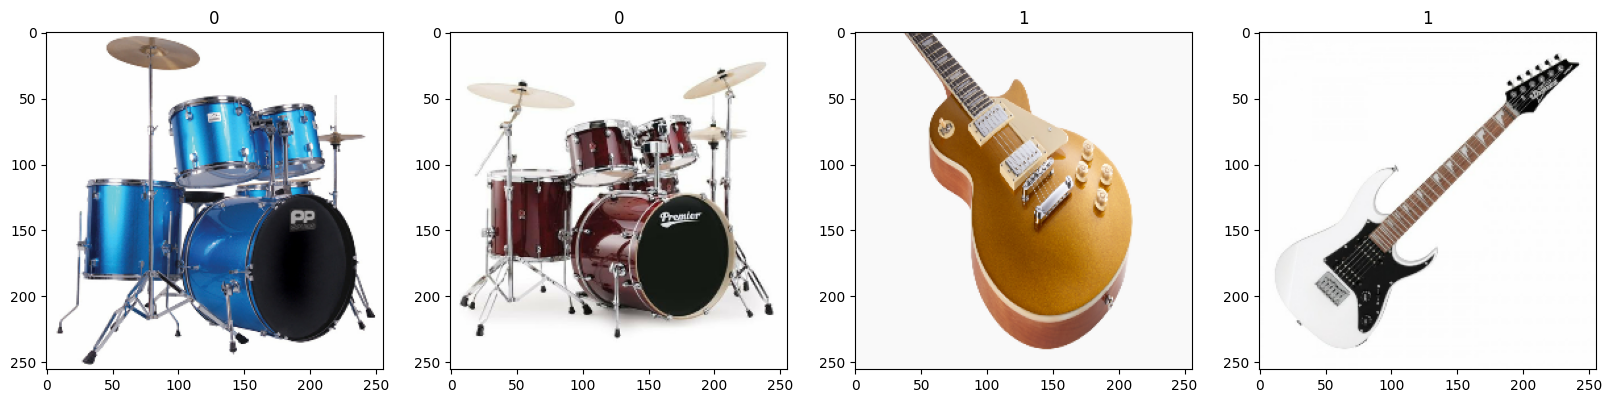

In [107]:
fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [108]:
data=data.map(lambda x,y:(x/255,y))

In [109]:
scaled_itarator = data.as_numpy_iterator()

In [110]:
scaled_itarator.next()[0].max()

1.0

In [111]:
batch=scaled_itarator.next()

In [112]:
batch[0].min()

0.0

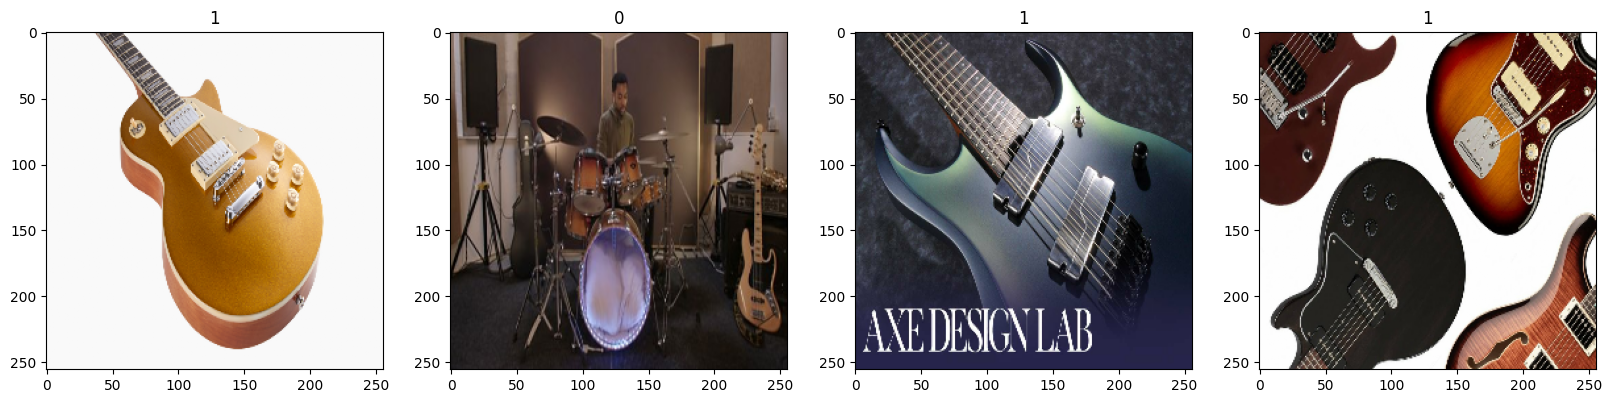

In [113]:
fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [114]:
len(data)

6

In [115]:
train_size = int(len(data)*.7)
valid_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [116]:
train_size

4

In [117]:
train= data.take(train_size)
test= data.skip(train_size + valid_size).take(test_size)
validation= data.skip(train_size).take(valid_size)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [119]:
model= Sequential()

In [120]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [121]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [123]:
logdir="/content/logs"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [124]:
hist=model.fit(train,epochs=20,validation_data=validation,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 1.2609 - accuracy: 0.5078 - val_loss: 0.6249 - val_accuracy: 0.8438
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6801 - accuracy: 0.5859 - val_loss: 0.7050 - val_accuracy: 0.4688
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6621 - accuracy: 0.5781 - val_loss: 0.6069 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.5745 - accuracy: 0.7656 - val_loss: 0.4783 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 15s 3s/step - loss: 0.5075 - accuracy: 0.7344 - val_loss: 0.5486 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.4271 - accuracy: 0.7734 - val_loss: 0.4121 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.3455 - accuracy: 0.8672 - val_loss: 0.3482 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

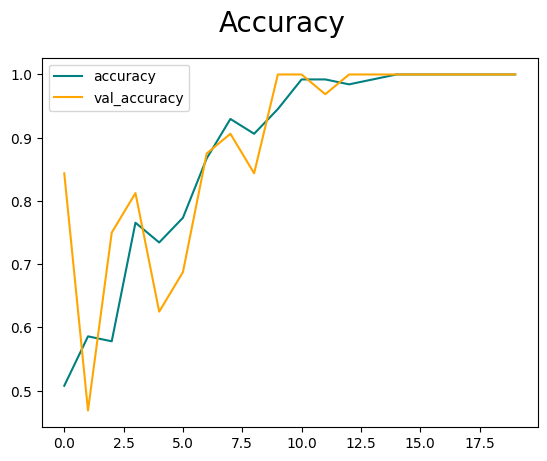

In [125]:
#accuracy

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [126]:
#evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


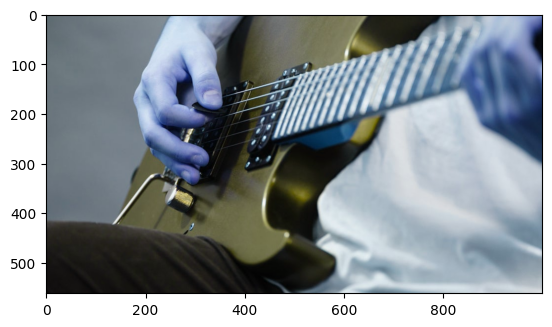

In [132]:
import cv2
img = cv2.imread('/content/electricguitardude_0.jpg')
plt.imshow(img)
plt.show()

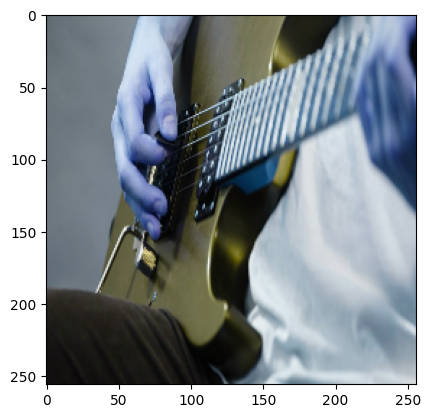

In [133]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 33ms/step


array([[0.9363787]], dtype=float32)

In [135]:
if yhat > 0.5:
    print(f'Predicted class is guitar')
else:
    print(f'Predicted class is drums')

Predicted class is guitar


Exception ignored in: <function _xla_gc_callback at 0x7cd4c2e31000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


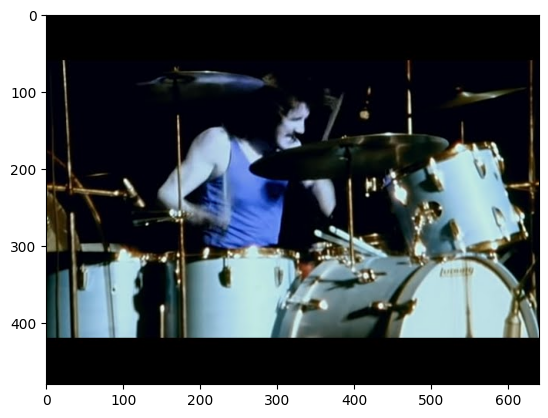

In [136]:
img = cv2.imread('/content/sddefault.jpg')
plt.imshow(img)
plt.show()

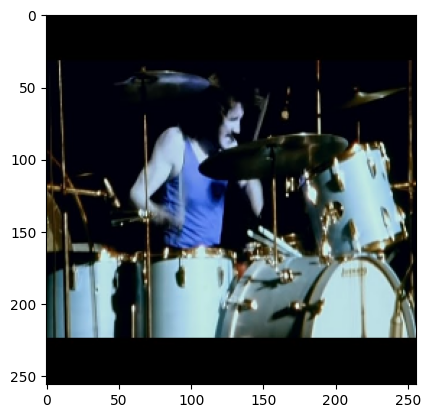

In [137]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [138]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 51ms/step


array([[4.578739e-05]], dtype=float32)

In [139]:
if yhat > 0.5:
    print(f'Predicted class is guitar')
else:
    print(f'Predicted class is drums')

Predicted class is drums
